In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
sys.path.append('../train/')
from preproc_6ax_data import load_and_preproc_data_single
import seaborn as sns
import glob
import numpy as np
sns.set()
sns.set_style('whitegrid')

In [4]:
ls /home/asya/Videos/silks/

0729_1salto_pancake_2_nopancake.MTS  0729_hipkey_salto_2_salto_nopancake.mp4
0729_3salto_pancake.mp4              0729_hipkey_salto_2_salto_nopancake.MTS
0729_3salto_pancake.MTS              1106_testseq1.mp4
0729_3salto_pancake_v2.mp4           1106_testseq_1.MTS


In [5]:
ls /home/asya/Desktop/Gyro_Data/bluepy_data/testdata_preproc

ls: cannot access '/home/asya/Desktop/Gyro_Data/bluepy_data/testdata_preproc': No such file or directory


In [143]:
df, b1_press_t, b2_press_t = load_and_preproc_data_single('/home/asya/Desktop/Gyro_Data/bluepy_data/testdata_preproc/1106_ctrl_test_seq1_preproc.txt')

In [145]:
## filter the values after the button press (synchronization cue)
df = df.loc[df.index>b1_press_t[0]]
b2_press_t = [a-b1_press_t[0] for a in b1_press_t]
df.index = df.index - b1_press_t[0]

In [133]:
class video_reader:
    def __init__(self, filename, synchframe):
        self.cap = cv2.VideoCapture(filename)
        self.fps = self.cap.get(cv2.CAP_PROP_FPS)
        self.synchframe = synchframe
        self.frame_width = int(self.cap.get(3))
        self.frame_height = int(self.cap.get(4))
        
    def get_width(self):
        return self.frame_width
    def get_height(self):
        return self.frame_height
    def get_fps(self):
        return self.fps
    
    def read_frames(self, init_frame, N_frames, limit_field = False):
        self.cap.set(1,init_frame+self.synchframe)

        frames = []
        
        j = 0
        while(self.cap.isOpened()):
            ret, frame = self.cap.read()
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            j+=1
            if j > N_frames: break
            if limit_field:
                frames.append(frame[0:800,550:1250,:])
            else:
                frames.append(frame)
        #self.cap.release()
        cv2.destroyAllWindows()
        return frames

In [134]:
VR = video_reader('/home/asya/Videos/silks/1106_testseq1.mp4', 480)

In [1]:
## demo initial button press frame
frames = VR.read_frames(0, 2, True)
fig, ax = plt.subplots(1,2, figsize = (8,7))
i = 0
ax[0].imshow(frames[i]);i = i+1; ax[0].axis('off')
ax[1].imshow(frames[i]);i = i+1; ax[1].axis('off')

NameError: name 'VR' is not defined

In [2]:
video_time = np.arange(df.index[0], df.index[-1], 1/VR.get_fps())

NameError: name 'np' is not defined

In [149]:
video_time

array([2.60000000e-02, 5.93666667e-02, 9.27333333e-02, ...,
       6.09535333e+01, 6.09869000e+01, 6.10202667e+01])

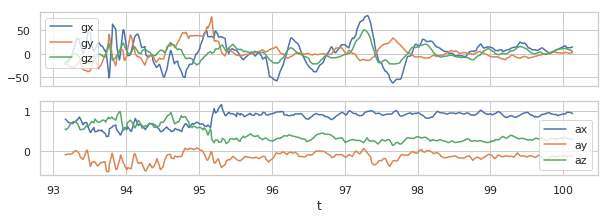

In [127]:
j = 0
df_clip = df.query('t > {} and t <{}'.format(b2_press_t[j]+0.5, b2_press_t[j]+7.5))
fig, ax = plt.subplots(2,1, sharex = True, figsize = (10,3))

df_clip.gx.plot(ax = ax[0], legend = 'gx')
df_clip.gy.plot(ax = ax[0], legend = 'gy')
df_clip.gz.plot(ax = ax[0], legend = 'gz')
#df_clip.button2.plot(ax = ax[0], legend = 'button', color = 'k')

df_clip.ax.plot(ax = ax[1], legend = 'ax')
df_clip.ay.plot(ax = ax[1], legend = 'ay')
df_clip.az.plot(ax = ax[1], legend = 'az')

In [79]:
if 0:
    fig, ax = plt.subplots(3,5, figsize = (15,10))
    i = 0
    ax[0,0].imshow(frames[i]);i = i+1; ax[0,0].axis('off')
    ax[0,1].imshow(frames[i]);i = i+1; ax[0,1].axis('off')
    ax[0,2].imshow(frames[i]);i = i+1; ax[0,2].axis('off')
    ax[0,3].imshow(frames[i]);i = i+1; ax[0,3].axis('off')
    ax[0,4].imshow(frames[i]);i = i+1; ax[0,4].axis('off')

    ax[1,0].imshow(frames[i]);i = i+1; ax[1,0].axis('off')
    ax[1,1].imshow(frames[i]);i = i+1; ax[1,1].axis('off')
    ax[1,2].imshow(frames[i]);i = i+1; ax[1,2].axis('off')
    ax[1,3].imshow(frames[i]);i = i+1; ax[1,3].axis('off')
    ax[1,4].imshow(frames[i]);i = i+1; ax[1,4].axis('off')

    ax[2,0].imshow(frames[i]);i = i+1; ax[2,0].axis('off')
    ax[2,1].imshow(frames[i]);i = i+1; ax[2,1].axis('off')
    ax[2,2].imshow(frames[i]);i = i+1; ax[2,2].axis('off')
    ax[2,3].imshow(frames[i]);i = i+1; ax[2,3].axis('off')
    ax[2,4].imshow(frames[i]);i = i+1; ax[2,4].axis('off')

In [29]:
df, b1_press_t, b2_press_t = load_and_preproc_data_single('/home/asya/Desktop/Gyro_Data/bluepy_data/silks_preproc/0729_3salto_pancake_preproc.txt')

In [30]:
60000/1001

59.94005994005994

In [31]:
cap = cv2.VideoCapture('/home/asya/Videos/silks/0729_3salto_pancake_v2.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)

j = 0
frames = []

#cap.set(1,10850);
cap.set(1,5425);

#cap.CV_LOAD_IMAGE_ANYDEPTH
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

while(cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    j+=1
    if j >100: break
    
    frames.append(frame[0:800,550:1250,:])

cap.release()
cv2.destroyAllWindows()
#plt.imshow(frame[0:800,550:1250], cmap = 'gray')
#plt.imshow(frame[0:800,550:1250,:])

In [32]:
fps

29.97002997002997

(-0.5, 699.5, 799.5, -0.5)

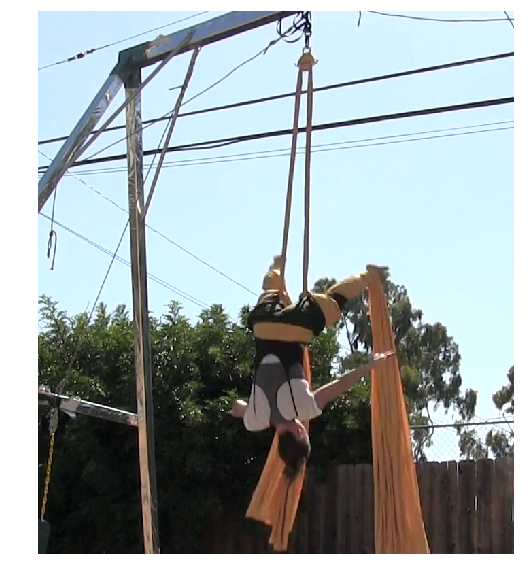

In [33]:
fig, ax = plt.subplots(figsize = (15,10))
ax.imshow(frames[40]);i = i+1; ax.axis('off')

(-0.5, 699.5, 799.5, -0.5)

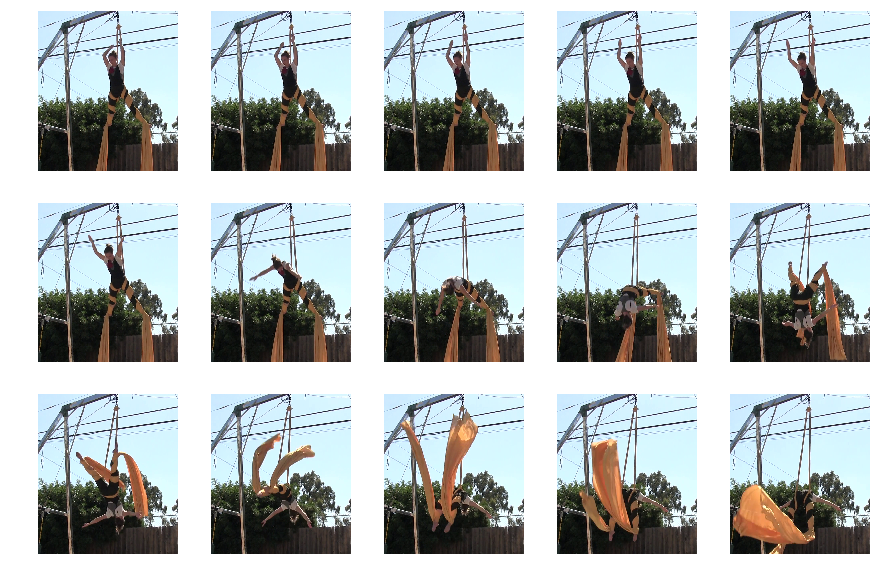

In [34]:
fig, ax = plt.subplots(3,5, figsize = (15,10))
i = 21
ax[0,0].imshow(frames[i]);i = i+1; ax[0,0].axis('off')
ax[0,1].imshow(frames[i]);i = i+1; ax[0,1].axis('off')
ax[0,2].imshow(frames[i]);i = i+1; ax[0,2].axis('off')
ax[0,3].imshow(frames[i]);i = i+1; ax[0,3].axis('off')
ax[0,4].imshow(frames[i]);i = i+1; ax[0,4].axis('off')

ax[1,0].imshow(frames[i]);i = i+4; ax[1,0].axis('off')
ax[1,1].imshow(frames[i]);i = i+4; ax[1,1].axis('off')
ax[1,2].imshow(frames[i]);i = i+4; ax[1,2].axis('off')
ax[1,3].imshow(frames[i]);i = i+4; ax[1,3].axis('off')
ax[1,4].imshow(frames[i]);i = i+4; ax[1,4].axis('off')

ax[2,0].imshow(frames[i]);i = i+5; ax[2,0].axis('off')
ax[2,1].imshow(frames[i]);i = i+5; ax[2,1].axis('off')
ax[2,2].imshow(frames[i]);i = i+5; ax[2,2].axis('off')
ax[2,3].imshow(frames[i]);i = i+5; ax[2,3].axis('off')
ax[2,4].imshow(frames[i]);i = i+5; ax[2,4].axis('off')

In [115]:
len(frames)

100

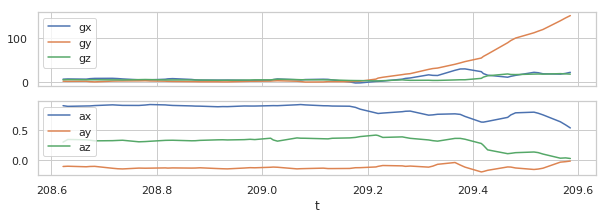

In [116]:
df_clip = df.query('t > {} and t <{}'.format(b2_press_t[2]+6.5, b2_press_t[2]+7.5))
fig, ax = plt.subplots(2,1, sharex = True, figsize = (10,3))

df_clip.gx.plot(ax = ax[0], legend = 'gx')
df_clip.gy.plot(ax = ax[0], legend = 'gy')
df_clip.gz.plot(ax = ax[0], legend = 'gz')
#df_clip.button2.plot(ax = ax[0], legend = 'button', color = 'k')

df_clip.ax.plot(ax = ax[1], legend = 'ax')
df_clip.ay.plot(ax = ax[1], legend = 'ay')
df_clip.az.plot(ax = ax[1], legend = 'az')
#df_clip.button2.plot(ax = ax[1], legend = 'button', color = 'k')

In [117]:
##209.2 = 0 for the clip
##i = 9 or 10 = 0 for the video
import matplotlib as mpl
## using 2000dps and 4G ranges

def makeframe(i, t0):
    gs = fig.add_gridspec(6,2)
    ax_v = fig.add_subplot(gs[:-2, :])
    ax_g = fig.add_subplot(gs[-2,:])
    ax_g.set_title('Gyroscope')
    ax_a = fig.add_subplot(gs[-1,:], sharex = ax_g)
    ax_a.set_title('Accel')
    
    ax_v.imshow(frames[i]);i = i+1; ax_v.axis('off')

    df_clip = df.query('t > {} and t <{}'.format(b2_press_t[2]+6.5, b2_press_t[2]+10))

    df_clip.gx.plot(ax = ax_g, legend = 'gx')
    df_clip.gy.plot(ax = ax_g, legend = 'gy')
    df_clip.gz.plot(ax = ax_g, legend = 'gz')

    ax_g.plot([t0,t0],[-10,350],color = 'k')
    ax_g.set_ylabel('dps')
    ax_g.get_xaxis().set_visible(False)
    #ax_g.axis('off')

    df_clip.ax.plot(ax =ax_a, legend = 'ax')
    df_clip.ay.plot(ax =ax_a, legend = 'ay')
    df_clip.az.plot(ax =ax_a, legend = 'az')
    ax_a.plot([t0,t0],[-3.5,1],color = 'k')

    tmax = np.floor(df_clip.index.max())
    ymin = -3.5
    ax_a.plot([tmax-1,tmax],[ymin,ymin],color = 'k')
    ax_a.text(tmax-.5, ymin-.5, '1 s', fontsize=10,
            verticalalignment='top')

    ax_a.set_ylabel('g')
    ax_a.get_xaxis().set_visible(False)

In [118]:
#df_clip.index

In [119]:
fig = plt.figure(figsize = (6,8), constrained_layout=True, dpi = 200)


mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'w'
mpl.rcParams['axes.grid'] = True


i0 = 21
t0 = 209.2

import imageio
with imageio.get_writer('./salto_data.gif', mode='I') as writer:
    for i in range(i0-7,80):
        t_i = t0 + (i-i0)/fps
        makeframe(i, t_i)
        fig.savefig('foo.png')
        image = imageio.imread('foo.png')
        writer.append_data(image)
        plt.clf()

#image = gcf()

<Figure size 1200x1600 with 0 Axes>

In [120]:
fig = plt.figure(figsize = (6,8), constrained_layout=True, dpi = 200)

mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'w'
mpl.rcParams['axes.grid'] = True

i0 = 21
t0 = 209.2

import imageio
with imageio.get_writer('./salto_data.mp4', mode='I') as writer:
    for i in range(i0-7,80):
        t_i = t0 + (i-i0)/fps
        makeframe(i, t_i)
        fig.savefig('foo.png')
        image = imageio.imread('foo.png')
        writer.append_data(image)
        plt.clf()

<Figure size 1200x1600 with 0 Axes>